In [1]:
"""
No Assumption (Ts!=Tk)
"""
#using mean x_alpha and mean Tk and T_gamma=2.72(1+z)K

import os
import numpy as np
import matplotlib.pyplot as plt
import glob



d_path=r'G:\CD_data_project'
output_path=r"‪G:\T_spin"
output_path = output_path.strip().replace('\u202a', '')


#read data 
def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    d=np.fromfile(f,dtype='float32')
    return d

def exTract(model,solar_mass,parameter):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*{model}*{parameter}.cbin")
    files = sorted(glob.glob(pattern))

    redshifts=[]
    mean_d=[]

    for f in files:        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_d.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_d))
    data.sort()
    redshifts,mean_d=(zip(*data))

    return np.array(redshifts),np.array(mean_d)
    
model,solar_mass="fx0.100E+00","Mmin0.100E+10"
z1,x_alpha=exTract(model,solar_mass,"lyalpha")
z2,T_k=exTract(model,solar_mass,"tk")
T_cmb=2.725*(1+z1)
T_spin=[]
T_spin=(1+x_alpha)/((1/T_cmb)+(x_alpha/T_k))

print("For X-ray heating model fx0.1,and halo-mass of 10^9 $M_{\\odot}$ \n")
for z,ts in zip(z1,T_spin):
    print("for redshift=",z,"Mean  Spin Temperature=",ts)

    #save the files
    z_str=f"{z:.3f}"
    print(repr(output_path))
    filename=f"{z:.3f}_{solar_mass}_{model}_tspin.cbin"
    fpath=os.path.join(output_path,filename)

    f=open(fpath,'wb')
    head=np.array([1,2,3],dtype='int32')
    head.tofile(f)
    np.array([ts],dtype='float32').tofile(f)
    f.close()


For X-ray heating model fx0.1,and halo-mass of 10^9 $M_{\odot}$ 

for redshift= 10.11 Mean  Spin Temperature= 942.6870972718953
'G:\\T_spin'
for redshift= 10.29 Mean  Spin Temperature= 821.1465284576054
'G:\\T_spin'
for redshift= 10.478 Mean  Spin Temperature= 708.6239582422364
'G:\\T_spin'
for redshift= 10.673 Mean  Spin Temperature= 603.5394239199562
'G:\\T_spin'
for redshift= 10.877 Mean  Spin Temperature= 511.16779161876843
'G:\\T_spin'
for redshift= 11.313 Mean  Spin Temperature= 352.00708434465326
'G:\\T_spin'
for redshift= 11.546 Mean  Spin Temperature= 287.6598031390762
'G:\\T_spin'
for redshift= 11.791 Mean  Spin Temperature= 230.50856030099075
'G:\\T_spin'
for redshift= 12.048 Mean  Spin Temperature= 181.93078200253774
'G:\\T_spin'
for redshift= 12.318 Mean  Spin Temperature= 141.95710037049344
'G:\\T_spin'
for redshift= 12.603 Mean  Spin Temperature= 108.33707644801403
'G:\\T_spin'
for redshift= 12.903 Mean  Spin Temperature= 81.26630853998506
'G:\\T_spin'
for redshift= 13.2

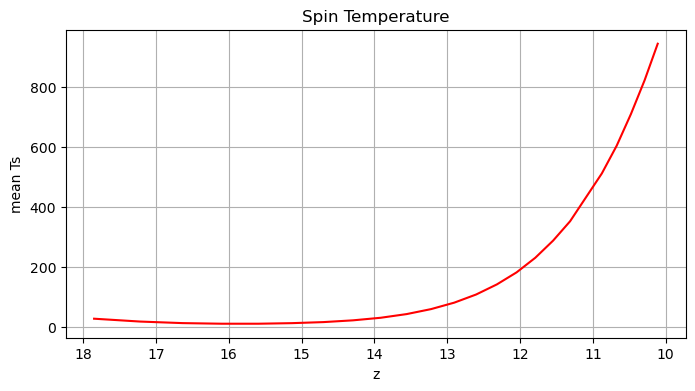

In [3]:
"""
fx=0.1, halo-mass=10^9
"""

fig,ax=plt.subplots(figsize=(8,4))

ax.plot(z1,T_spin,linestyle='-',color='red')
ax.set_title("Spin Temperature")
ax.set_xlabel("z")    
ax.set_ylabel("mean Ts")   
ax.invert_xaxis()
ax.grid(True)
#ax.legend()
plt.show()
#for i in z1:
#x=i
#y=T_spin[i]

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

d_path=r'G:\CD_data_project'
output_path=r"‪G:\T_spin"
output_path = output_path.strip().replace('\u202a', '')

#read data 
def read_data(file):
    f=open(file,'rb')
    n=np.fromfile(f,count=3,dtype='int32')
    d=np.fromfile(f,dtype='float32')
    return d

def exTract(model,solar_mass,parameter):
    
    pattern = os.path.join(d_path, f"*{solar_mass}*{model}*{parameter}.cbin")
    files = sorted(glob.glob(pattern))

    redshifts=[]
    mean_d=[]

    for f in files:        
        #extracting z from path
        fname=os.path.basename(f)
        z_=fname.split("zeta")[0]
        z=float(z_)

        data=read_data(f)
        m=np.mean(data)

        redshifts.append(z)
        mean_d.append(m)

    #sort by making list
    data=list(zip(redshifts,mean_d))
    data.sort()
    redshifts,mean_d=(zip(*data))

    return np.array(redshifts),np.array(mean_d)

In [14]:
model,solar_mass="fx0.100E+00","Mmin0.100E+11"
z1,x_alpha=exTract(model,solar_mass,"lyalpha")
z2,T_k=exTract(model,solar_mass,"tk")
T_cmb=2.725*(1+z1)
T_spin1=[]
T_spin1=(1+x_alpha)/(((T_cmb)**(-1))+x_alpha*T_k**(-1))

print("For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\\odot}$ \n")
for z,ts in zip(z1,T_spin1):
    print("for redshift=",z,"Mean Spin Temperature=",ts)
    #save the files
    z_str=f"{z:.3f}"
    print(repr(output_path))
    filename=f"{z:.3f}_{solar_mass}_{model}_tspin.cbin"
    fpath=os.path.join(output_path,filename)

    f=open(fpath,'wb')
    head=np.array([1,2,3],dtype='int32')
    head.tofile(f)
    np.array([ts],dtype='float32').tofile(f)
    f.close()

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\579995217.py:8: SyntaxWarning: invalid escape sequence '\o'
  print("For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\odot}$ \n")


For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\odot}$ 

for redshift= 10.11   Spin Temperature= 248.7126615035169
'G:\\T_spin'
for redshift= 10.29   Spin Temperature= 202.94382348757503
'G:\\T_spin'
for redshift= 10.478   Spin Temperature= 163.74590133102217
'G:\\T_spin'
for redshift= 10.673   Spin Temperature= 129.80184299172046
'G:\\T_spin'
for redshift= 10.877   Spin Temperature= 101.90513204190484
'G:\\T_spin'
for redshift= 11.313   Spin Temperature= 59.2780766247795
'G:\\T_spin'
for redshift= 11.546   Spin Temperature= 44.43087505096864
'G:\\T_spin'
for redshift= 11.791   Spin Temperature= 32.689461846686385
'G:\\T_spin'
for redshift= 12.048   Spin Temperature= 24.02419433491158
'G:\\T_spin'
for redshift= 12.318   Spin Temperature= 17.800806475218213
'G:\\T_spin'
for redshift= 12.603   Spin Temperature= 13.399147495032715
'G:\\T_spin'
for redshift= 12.903   Spin Temperature= 10.514192076813822
'G:\\T_spin'
for redshift= 13.221   Spin Temperature= 8.902590933559239
'

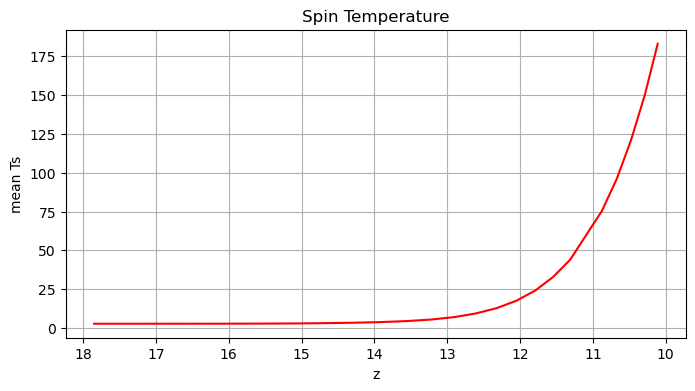

In [13]:
fig,ax=plt.subplots(figsize=(8,4))

ax.plot(z1,T_spin1,linestyle='-',color='red')
ax.set_title("Spin Temperature")
ax.set_xlabel("z")    
ax.set_ylabel("mean Ts")   
ax.invert_xaxis()
ax.grid(True)
#ax.legend()
plt.show()
#for i in z1:
#x=i
#y=T_spin[i]

In [15]:
model,solar_mass="fx0.100E+04","Mmin0.100E+10"
z1,x_alpha=exTract(model,solar_mass,"lyalpha")
z2,T_k=exTract(model,solar_mass,"tk")
T_spin2=[]
T_spin2=(1+x_alpha)/(((T_cmb)**(-1))+x_alpha*T_k**(-1))

print("For X-ray heating model fx0.1,and halo-mass of $10^{9}$ $M_{\\odot}$ \n")
for z,ts in zip(z1,T_spin2):
    print("for redshift=",z,"Mean  Spin Temperature=",ts)

    #save the files
    z_str=f"{z:.3f}"
    print(repr(output_path))
    filename=f"{z:.3f}_{solar_mass}_{model}_tspin.cbin"
    fpath=os.path.join(output_path,filename)

    f=open(fpath,'wb')
    head=np.array([1,2,3],dtype='int32')
    head.tofile(f)
    np.array([ts],dtype='float32').tofile(f)
    f.close()

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\4192989321.py:7: SyntaxWarning: invalid escape sequence '\o'
  print("For X-ray heating model fx0.1,and halo-mass of $10^{9}$ $M_{\odot}$ \n")


For X-ray heating model fx0.1,and halo-mass of $10^{9}$ $M_{\odot}$ 

for redshift= 10.11   Spin Temperature= 8658.232777161276
'G:\\T_spin'
for redshift= 10.29   Spin Temperature= 7838.200144338515
'G:\\T_spin'
for redshift= 10.478   Spin Temperature= 6956.612341439701
'G:\\T_spin'
for redshift= 10.673   Spin Temperature= 6033.530256266905
'G:\\T_spin'
for redshift= 10.877   Spin Temperature= 5127.016631133841
'G:\\T_spin'
for redshift= 11.313   Spin Temperature= 3467.596460408979
'G:\\T_spin'
for redshift= 11.546   Spin Temperature= 2768.949985577322
'G:\\T_spin'
for redshift= 11.791   Spin Temperature= 2165.5778151032473
'G:\\T_spin'
for redshift= 12.048   Spin Temperature= 1657.608001266277
'G:\\T_spin'
for redshift= 12.318   Spin Temperature= 1240.7203176342286
'G:\\T_spin'
for redshift= 12.603   Spin Temperature= 904.6901042043103
'G:\\T_spin'
for redshift= 12.903   Spin Temperature= 644.2070165275878
'G:\\T_spin'
for redshift= 13.221   Spin Temperature= 446.71583185258083
'G:\\T

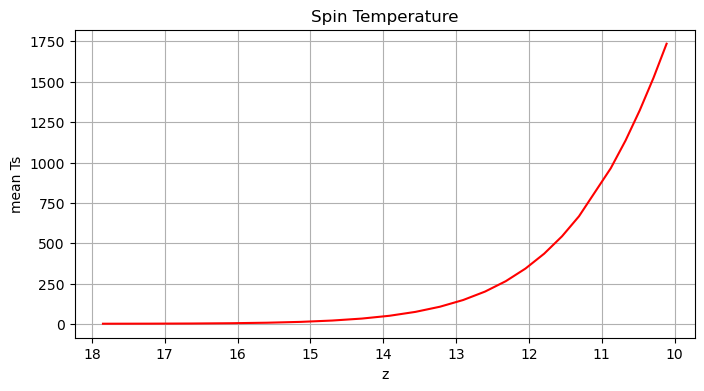

In [26]:
fig,ax=plt.subplots(figsize=(8,4))

ax.plot(z1,T_spin2,linestyle='-',color='red')
ax.set_title("Spin Temperature")
ax.set_xlabel("z")    
ax.set_ylabel("mean Ts")   
ax.invert_xaxis()
ax.grid(True)
plt.show()


In [16]:
model,solar_mass="fx0.100E+04","Mmin0.100E+11"
z1,x_alpha=exTract(model,solar_mass,"lyalpha")
z2,T_k=exTract(model,solar_mass,"tk")
T_spin3=[]
T_spin3=(1+x_alpha)/(((T_cmb)**(-1))+x_alpha*T_k**(-1))

print("For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\\odot}$ \n")
for z,ts in zip(z1,T_spin3):
    print("for redshift=",z,"  Spin Temperature=",ts)
    #save the files
    z_str=f"{z:.3f}"
    print(repr(output_path))
    filename=f"{z:.3f}_{solar_mass}_{model}_tspin.cbin"
    fpath=os.path.join(output_path,filename)

    f=open(fpath,'wb')
    head=np.array([1,2,3],dtype='int32')
    head.tofile(f)
    np.array([ts],dtype='float32').tofile(f)
    f.close()

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\1669997306.py:7: SyntaxWarning: invalid escape sequence '\o'
  print("For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\odot}$ \n")


For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\odot}$ 

for redshift= 10.11   Spin Temperature= 2764.70111404092
'G:\\T_spin'
for redshift= 10.29   Spin Temperature= 2216.3632716551006
'G:\\T_spin'
for redshift= 10.478   Spin Temperature= 1746.3627405283141
'G:\\T_spin'
for redshift= 10.673   Spin Temperature= 1349.9466747332065
'G:\\T_spin'
for redshift= 10.877   Spin Temperature= 1025.088792511003
'G:\\T_spin'
for redshift= 11.313   Spin Temperature= 552.2311190733204
'G:\\T_spin'
for redshift= 11.546   Spin Temperature= 393.52177792144954
'G:\\T_spin'
for redshift= 11.791   Spin Temperature= 273.9814788583804
'G:\\T_spin'
for redshift= 12.048   Spin Temperature= 186.45526026429616
'G:\\T_spin'
for redshift= 12.318   Spin Temperature= 124.35004688871
'G:\\T_spin'
for redshift= 12.603   Spin Temperature= 81.52310136741487
'G:\\T_spin'
for redshift= 12.903   Spin Temperature= 53.02509842480453
'G:\\T_spin'
for redshift= 13.221   Spin Temperature= 35.245782143777454
'G:\\

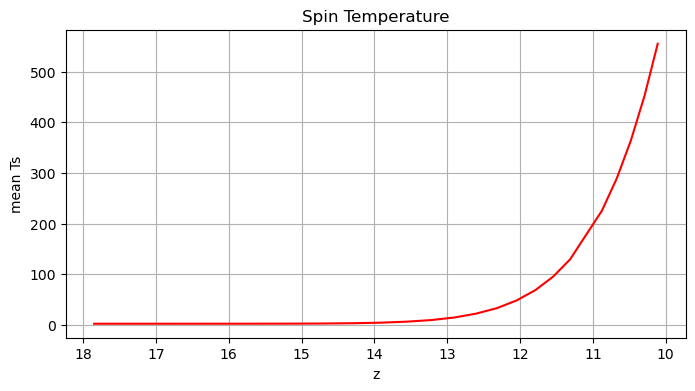

In [29]:
fig,ax=plt.subplots(figsize=(8,4))

ax.plot(z1,T_spin3,linestyle='-',color='red')
ax.set_title("Spin Temperature")
ax.set_xlabel("z")    
ax.set_ylabel("mean Ts")   
ax.invert_xaxis()
ax.grid(True)
plt.show()


In [17]:
model,solar_mass="fx0.464E+02","Mmin0.100E+10"
z1,x_alpha=exTract(model,solar_mass,"lyalpha")
z2,T_k=exTract(model,solar_mass,"tk")
T_spin4=[]
T_spin4=(1+x_alpha)/(((T_cmb)**(-1))+x_alpha*T_k**(-1))

print("For X-ray heating model fx0.1,and halo-mass of $10^{9}$ $M_{\\odot}$ \n")
for z,ts in zip(z1,T_spin4):
    print("for redshift=",z,"  Spin Temperature=",ts)

    #save the files
    z_str=f"{z:.3f}"
    print(repr(output_path))
    filename=f"{z:.3f}_{solar_mass}_{model}_tspin.cbin"
    fpath=os.path.join(output_path,filename)

    f=open(fpath,'wb')
    head=np.array([1,2,3],dtype='int32')
    head.tofile(f)
    np.array([ts],dtype='float32').tofile(f)
    f.close()

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\930067348.py:7: SyntaxWarning: invalid escape sequence '\o'
  print("For X-ray heating model fx0.1,and halo-mass of $10^{9}$ $M_{\odot}$ \n")


For X-ray heating model fx0.1,and halo-mass of $10^{9}$ $M_{\odot}$ 

for redshift= 10.11   Spin Temperature= 2012.7617342844844
'G:\\T_spin'
for redshift= 10.29   Spin Temperature= 1726.7098383683613
'G:\\T_spin'
for redshift= 10.478   Spin Temperature= 1468.4144109562412
'G:\\T_spin'
for redshift= 10.673   Spin Temperature= 1225.90389676643
'G:\\T_spin'
for redshift= 10.877   Spin Temperature= 1017.5133871093494
'G:\\T_spin'
for redshift= 11.313   Spin Temperature= 660.6907558449855
'G:\\T_spin'
for redshift= 11.546   Spin Temperature= 529.8159162044751
'G:\\T_spin'
for redshift= 11.791   Spin Temperature= 412.1643316544727
'G:\\T_spin'
for redshift= 12.048   Spin Temperature= 318.01304529575947
'G:\\T_spin'
for redshift= 12.318   Spin Temperature= 240.4898393431955
'G:\\T_spin'
for redshift= 12.603   Spin Temperature= 174.99689947795636
'G:\\T_spin'
for redshift= 12.903   Spin Temperature= 127.08513263224455
'G:\\T_spin'
for redshift= 13.221   Spin Temperature= 91.22070444374872
'G:

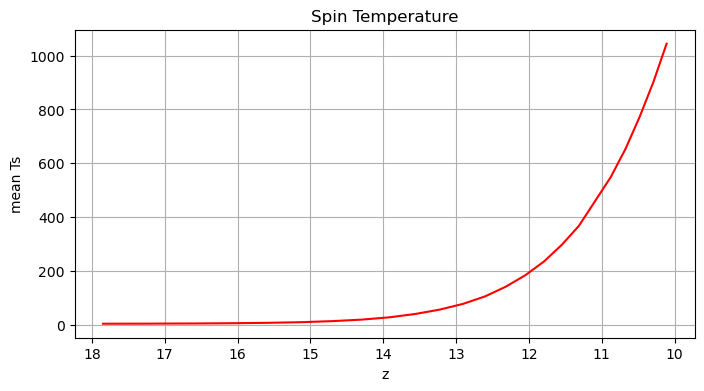

In [36]:
fig,ax=plt.subplots(figsize=(8,4))

ax.plot(z1,T_spin4,linestyle='-',color='red')
ax.set_title("Spin Temperature")
ax.set_xlabel("z")    
ax.set_ylabel("mean Ts")   
ax.invert_xaxis()
ax.grid(True)
plt.show()

In [18]:
model,solar_mass="fx0.464E+02","Mmin0.100E+11"
z1,x_alpha=exTract(model,solar_mass,"lyalpha")
z2,T_k=exTract(model,solar_mass,"tk")
T_spin5=[]
T_spin5=(1+x_alpha)/(((T_cmb)**(-1))+x_alpha*T_k**(-1))

print("For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\\odot}$ \n")
for z,ts in zip(z1,T_spin5):
    print("for redshift=",z,"  Spin Temperature=",ts)

    #save the files
    z_str=f"{z:.3f}"
    print(repr(output_path))
    filename=f"{z:.3f}_{solar_mass}_{model}_tspin.cbin"
    fpath=os.path.join(output_path,filename)

    f=open(fpath,'wb')
    head=np.array([1,2,3],dtype='int32')
    head.tofile(f)
    np.array([ts],dtype='float32').tofile(f)
    f.close()

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_10600\744736704.py:7: SyntaxWarning: invalid escape sequence '\o'
  print("For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\odot}$ \n")


For X-ray heating model fx0.1,and halo-mass of $10^{10}$ $M_{\odot}$ 

for redshift= 10.11   Spin Temperature= 554.4197862105692
'G:\\T_spin'
for redshift= 10.29   Spin Temperature= 447.8147252158261
'G:\\T_spin'
for redshift= 10.478   Spin Temperature= 358.16136331175534
'G:\\T_spin'
for redshift= 10.673   Spin Temperature= 279.68652756903316
'G:\\T_spin'
for redshift= 10.877   Spin Temperature= 216.6578111161424
'G:\\T_spin'
for redshift= 11.313   Spin Temperature= 119.77903915331115
'G:\\T_spin'
for redshift= 11.546   Spin Temperature= 88.65353762085371
'G:\\T_spin'
for redshift= 11.791   Spin Temperature= 63.17782502015459
'G:\\T_spin'
for redshift= 12.048   Spin Temperature= 44.91809200771027
'G:\\T_spin'
for redshift= 12.318   Spin Temperature= 31.383702293682045
'G:\\T_spin'
for redshift= 12.603   Spin Temperature= 21.528338027118696
'G:\\T_spin'
for redshift= 12.903   Spin Temperature= 15.475613771336903
'G:\\T_spin'
for redshift= 13.221   Spin Temperature= 11.951230705554684
'

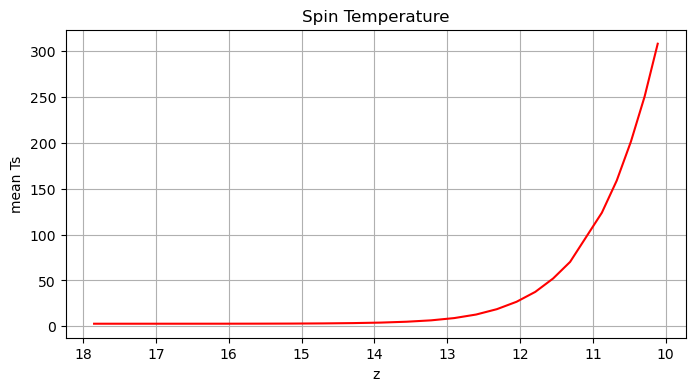

In [38]:
fig,ax=plt.subplots(figsize=(8,4))

ax.plot(z1,T_spin5,linestyle='-',color='red')
ax.set_title("Spin Temperature")
ax.set_xlabel("z")    
ax.set_ylabel("mean Ts")   
ax.invert_xaxis()
ax.grid(True)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\1270607527.py:8: SyntaxWarning: invalid escape sequence '\o'
  ax.set_title("Spin Temperature Comparisons at fixed minimum Halo-mass $10^{9}$ $M_{\odot}$")


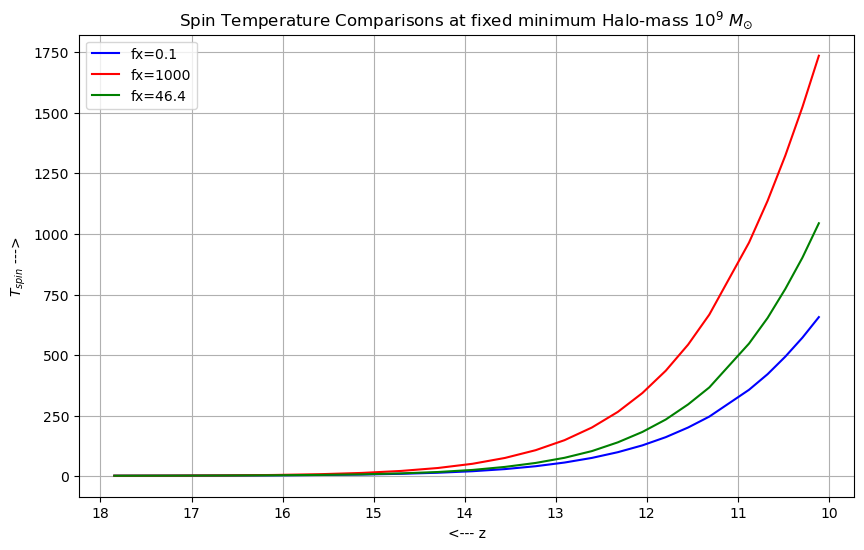

In [51]:
#varying fx=0.1,1000,46.4  fixed min halo-mass=10^9

fig,ax=plt.subplots(figsize=(10,6))

ax.plot(z1,T_spin,linestyle='-',color='blue',label='fx=0.1')
ax.plot(z1,T_spin2,linestyle='-',color='red',label='fx=1000')
ax.plot(z1,T_spin4,linestyle='-',color='green',label='fx=46.4')
ax.set_title("Spin Temperature Comparisons at fixed minimum Halo-mass $10^{9}$ $M_{\\odot}$")
ax.set_xlabel("<--- z")    
ax.set_ylabel("$T_{spin}$ --->")   
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\2637782151.py:8: SyntaxWarning: invalid escape sequence '\o'
  ax.set_title("Spin Temperature Comparisons at fixed minimum Halo-mass $10^{10}$ $M_{\odot}$")


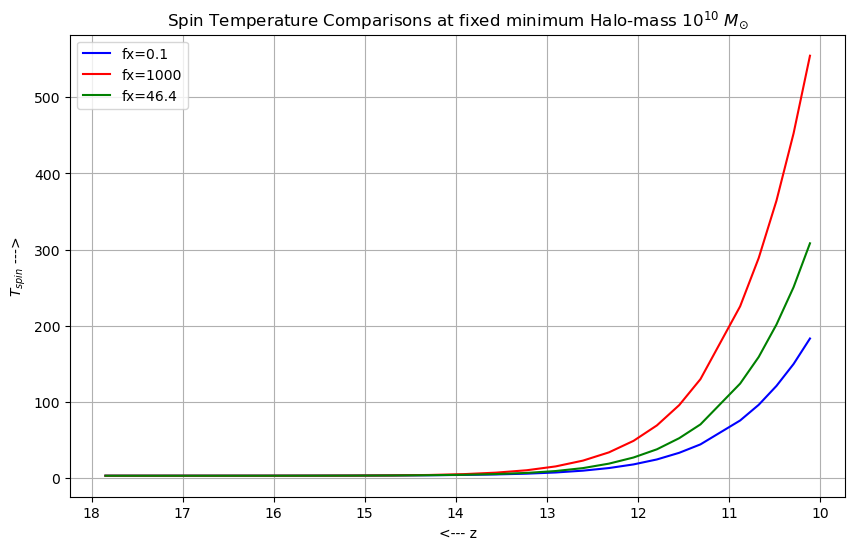

In [53]:
#varying fx=0.1,1000,46.4  fixed min halo-mass=10^10

fig,ax=plt.subplots(figsize=(10,6))

ax.plot(z1,T_spin1,linestyle='-',color='blue',label='fx=0.1')
ax.plot(z1,T_spin3,linestyle='-',color='red',label='fx=1000')
ax.plot(z1,T_spin5,linestyle='-',color='green',label='fx=46.4')
ax.set_title("Spin Temperature Comparisons at fixed minimum Halo-mass $10^{10}$ $M_{\\odot}$")
ax.set_xlabel("<--- z")    
ax.set_ylabel("$T_{spin}$ --->")   
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

In [ ]:
"""
The above 2 graphs indicate that rise in spin temperature is observed earlier in X-ray heating model fx=1000, and latest for fx=0.1,
at a fixed halo mass. Also, the rise in spin temperature is highest in case of fx=1000. 
This indicates that the spin temperature starts rising earlier and more for higher X-ray heating of 1000. 
"""

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\1825084946.py:5: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(z1,T_spin,linestyle='-',color='blue',label='$10^{9}$ $M_{\odot}$')
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\1825084946.py:6: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(z1,T_spin1,linestyle='-',color='red',label='$10^{10}$ $M_{\odot}$')


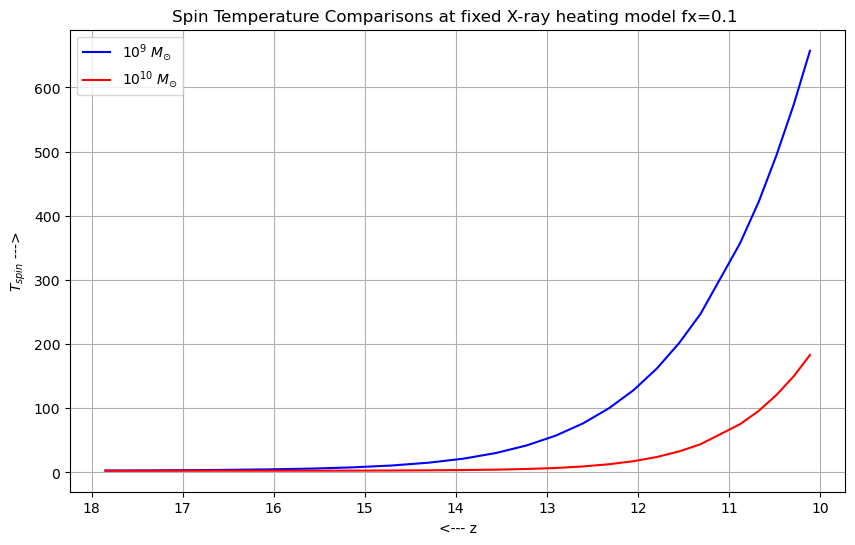

In [55]:
#varying min halo-mass=10^9,10^10 and fixed fx=0.1

fig,ax=plt.subplots(figsize=(10,6))

ax.plot(z1,T_spin,linestyle='-',color='blue',label='$10^{9}$ $M_{\\odot}$')
ax.plot(z1,T_spin1,linestyle='-',color='red',label='$10^{10}$ $M_{\\odot}$')

ax.set_title("Spin Temperature Comparisons at fixed X-ray heating model fx=0.1 ")
ax.set_xlabel("<--- z")    
ax.set_ylabel("$T_{spin}$ --->")   
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\1621807863.py:5: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(z1,T_spin2,linestyle='-',color='blue',label='$10^{9}$ $M_{\odot}$')
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\1621807863.py:6: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(z1,T_spin3,linestyle='-',color='red',label='$10^{10}$ $M_{\odot}$')


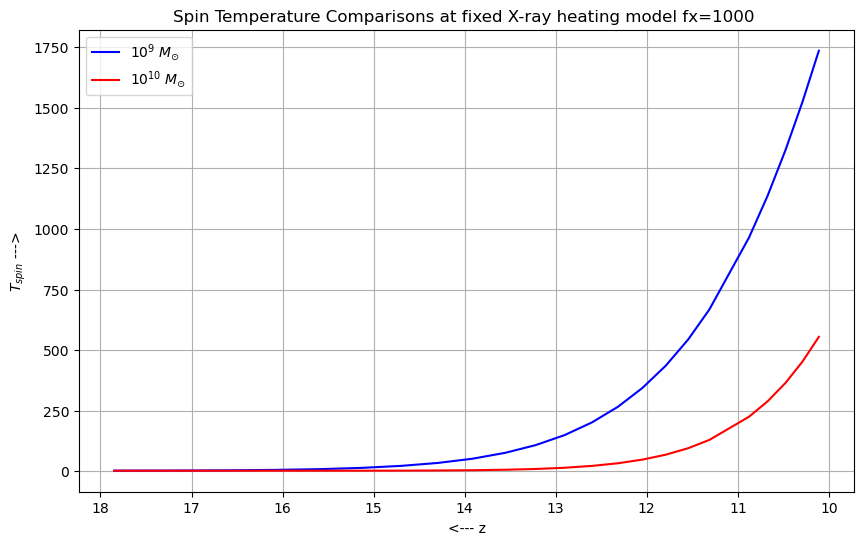

In [57]:
#varying min halo-mass=10^9,10^10 and fixed fx=1000 

fig,ax=plt.subplots(figsize=(10,6))

ax.plot(z1,T_spin2,linestyle='-',color='blue',label='$10^{9}$ $M_{\\odot}$')
ax.plot(z1,T_spin3,linestyle='-',color='red',label='$10^{10}$ $M_{\\odot}$')

ax.set_title("Spin Temperature Comparisons at fixed X-ray heating model fx=1000 ")
ax.set_xlabel("<--- z")    
ax.set_ylabel("$T_{spin}$ --->")   
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\1393452752.py:5: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(z1,T_spin4,linestyle='-',color='blue',label='$10^{9}$ $M_{\odot}$')
C:\Users\HP\AppData\Local\Temp\ipykernel_14796\1393452752.py:6: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(z1,T_spin5,linestyle='-',color='red',label='$10^{10}$ $M_{\odot}$')


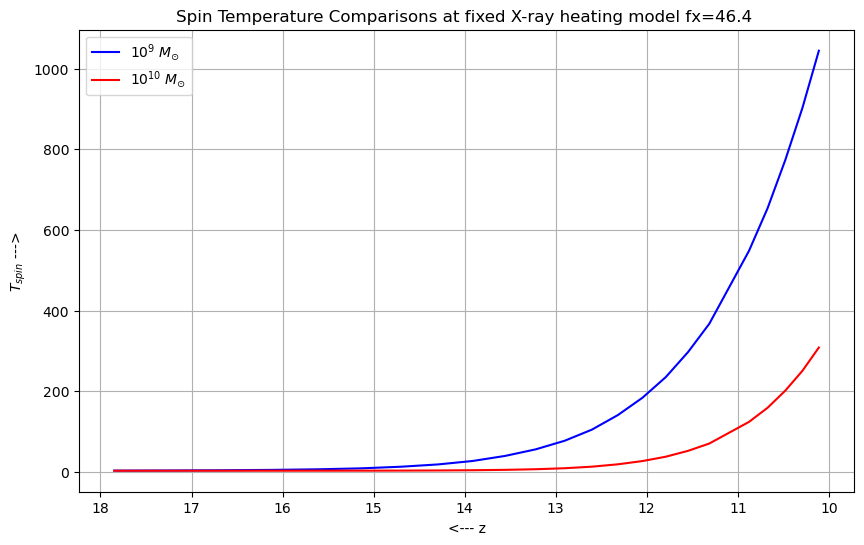

In [59]:
#varying min halo-mass=10^9,10^10 and fixed fx=46.4

fig,ax=plt.subplots(figsize=(10,6))

ax.plot(z1,T_spin4,linestyle='-',color='blue',label='$10^{9}$ $M_{\\odot}$')
ax.plot(z1,T_spin5,linestyle='-',color='red',label='$10^{10}$ $M_{\\odot}$')

ax.set_title("Spin Temperature Comparisons at fixed X-ray heating model fx=46.4 ")
ax.set_xlabel("<--- z")    
ax.set_ylabel("$T_{spin}$ --->")   
ax.invert_xaxis()
ax.grid(True)
ax.legend()
plt.show()

In [ ]:
"""
The above 3 plots show that for smaller halo mass of 10^9 solar mass, the spin temperature rises earlier and reaches a higher
temperature for the same, in case of the  3 models. 
"""

In [24]:
print (T_spin4)

[2012.76173428 1726.70983837 1468.41441096 1225.90389677 1017.51338711
  660.69075584  529.8159162   412.16433165  318.0130453   240.48983934
  174.99689948  127.08513263   91.22070444   64.01142685   43.08594891
   29.53682614   20.98033501   15.02176181   12.39455914   11.63957319
   13.45993237   18.50993083   27.88859757]
